In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline

In [3]:
# data loading
df=pd.read_csv('data.csv')

In [4]:
df.head()

GG-4_MW     GENERATOR MVAR     SH/RH ATTEMP TEMP    \
0      127.498              26.34                 26.34   
1      127.999             26.281                26.281   
2      128.031             26.277                26.277   
3      128.058             26.274                26.274   
4      127.805              26.27                 26.27   

     Mill Outlet Feeder -B coal ON BELT    \
0                                     0.0   
1                                     0.0   
2                                     0.0   
3                                     0.0   
4                                     0.0   

     Gravimetric Feeder A COAL ON BELT    \
0                                    0.0   
1                                    0.0   
2                                    0.0   
3                                    0.0   
4                                    0.0   

     Gravimetric Feeder D COAL ON BELT    \
0                                 26.819   
1                                 26.487   
2                                 26.154   
3                                 25.822   
4                                 25.489   

     Gravimetric Feeder C COAL ON BELT    \
0                                 25.672   
1                                 24.755   
2                                 23.838   
3                                 23.033   
4                                 22.819   

     Gravimetric Feeder F COAL ON BELT    \
0                                 26.118   
1                                 23.861   
2                                 21.604   
3                                 19.813   
4                                 19.376   

     Gravimetric Feeder E COAL ON BELT      CEP SUCTION  TEMP-A    ...  \
0                                 24.206                   46.913  ...   
1                                 23.857                   46.584  ...   
2                                 23.508                   46.546  ...   
3                                 23.159                   46.387  ...   
4                                 22.810                   46.300  ...   

     43LBA10DT901_XJ04.VALUE     43LBC00CP102_XQ01.VALUE    \
0                      538.540                      21.046   
1                      539.810                      21.230   
2                      541.304                      21.066   
3                      544.979                      20.930   
4                      544.338                      20.899   

     43HLD10CT106A_TA08.VALUE      43HLD20CT101A_TA11.VALUE    \
0                       289.041                        27.125   
1                       291.854                        26.876   
2                       294.275                        26.902   
3                       298.003                        26.938   
4                       295.996                        26.975   

     43HLB01DF902_XT02.VALUE      SEC AIR I/L TEMP-A    \
0                      329.297                  27.502   
1                      351.073                  27.373   
2                      361.672                  27.245   
3                      387.005                  27.116   
4                      353.150                  26.987   

     43HBK10AA101_XJ50.VALUE      PA HEADER PRESSURE-1    \
0                       -0.285                   710.327   
1                       -0.344                   711.050   
2                       -0.366                   711.240   
3                       -0.366                   710.597   
4                       -0.366                   710.701   

     PA HEADER PRESSURE-2    heat rate  
0                   698.316       2446  
1                   699.247       2465  
2                   699.342       2455  
3                   699.258       2444  
4                   699.150       2434  

[5 rows x 108 columns]

In [5]:
df.shape

(744, 108)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 744 entries, 0 to 743
Columns: 108 entries,   GG-4_MW   to heat rate
dtypes: float64(103), int64(1), object(4)
memory usage: 627.9+ KB


In [7]:
df.select_dtypes(include='object').head()


GENERATOR MVAR   SH/RH ATTEMP TEMP   04-TC107.ACE    \
0            26.34               26.34      33046.076   
1           26.281              26.281      32734.978   
2           26.277              26.277      33070.069   
3           26.274              26.274      33275.294   
4            26.27               26.27      33610.858   

  43HLD10CT113A_XQ03.VALUE    
0                    292.584  
1                    293.374  
2                    294.163  
3                    294.953  
4                    295.743

In [8]:
df.select_dtypes(include='object').columns

Index(['  GENERATOR MVAR  ', '  SH/RH ATTEMP TEMP  ', '  04-TC107.ACE  ',
       '  43HLD10CT113A_XQ03.VALUE  '],
      dtype='object')

In [9]:
object_cols = df.select_dtypes(include='object').columns

for col in object_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 744 entries, 0 to 743
Columns: 108 entries,   GG-4_MW   to heat rate
dtypes: float64(107), int64(1)
memory usage: 627.9 KB


In [11]:
df.select_dtypes(include='float64').head()


GG-4_MW    GENERATOR MVAR    SH/RH ATTEMP TEMP    \
0    127.498            26.340               26.340   
1    127.999            26.281               26.281   
2    128.031            26.277               26.277   
3    128.058            26.274               26.274   
4    127.805            26.270               26.270   

   Mill Outlet Feeder -B coal ON BELT    Gravimetric Feeder A COAL ON BELT    \
0                                   0.0                                  0.0   
1                                   0.0                                  0.0   
2                                   0.0                                  0.0   
3                                   0.0                                  0.0   
4                                   0.0                                  0.0   

   Gravimetric Feeder D COAL ON BELT    Gravimetric Feeder C COAL ON BELT    \
0                               26.819                               25.672   
1                               26.487                               24.755   
2                               26.154                               23.838   
3                               25.822                               23.033   
4                               25.489                               22.819   

   Gravimetric Feeder F COAL ON BELT    Gravimetric Feeder E COAL ON BELT    \
0                               26.118                               24.206   
1                               23.861                               23.857   
2                               21.604                               23.508   
3                               19.813                               23.159   
4                               19.376                               22.810   

   CEP SUCTION  TEMP-A    ...  03LBA20CP002_XQ10    43LBA10DT901_XJ04.VALUE    \
0                 46.913  ...               99.707                    538.540   
1                 46.584  ...               99.707                    539.810   
2                 46.546  ...               99.707                    541.304   
3                 46.387  ...               99.707                    544.979   
4                 46.300  ...               99.707                    544.338   

   43LBC00CP102_XQ01.VALUE    43HLD10CT106A_TA08.VALUE    \
0                     21.046                     289.041   
1                     21.230                     291.854   
2                     21.066                     294.275   
3                     20.930                     298.003   
4                     20.899                     295.996   

   43HLD20CT101A_TA11.VALUE    43HLB01DF902_XT02.VALUE    \
0                      27.125                    329.297   
1                      26.876                    351.073   
2                      26.902                    361.672   
3                      26.938                    387.005   
4                      26.975                    353.150   

   SEC AIR I/L TEMP-A    43HBK10AA101_XJ50.VALUE    PA HEADER PRESSURE-1    \
0                27.502                     -0.285                 710.327   
1                27.373                     -0.344                 711.050   
2                27.245                     -0.366                 711.240   
3                27.116                     -0.366                 710.597   
4                26.987                     -0.366                 710.701   

   PA HEADER PRESSURE-2    
0                 698.316  
1                 699.247  
2                 699.342  
3                 699.258  
4                 699.150  

[5 rows x 107 columns]

In [12]:
df.select_dtypes(include='int64').head()


heat rate
0       2446
1       2465
2       2455
3       2444
4       2434

In [13]:
df.describe()

GG-4_MW      GENERATOR MVAR      SH/RH ATTEMP TEMP    \
count   744.000000          722.000000             722.000000   
mean    127.989583           26.336368              26.336368   
std      17.625688            2.906408               2.906408   
min      90.479000            6.452000               6.452000   
25%     120.280750           26.047500              26.047500   
50%     124.798500           26.713000              26.713000   
75%     130.460500           27.421500              27.421500   
max     212.228000           33.728000              33.728000   

         Mill Outlet Feeder -B coal ON BELT    \
count                              744.000000   
mean                                 6.461759   
std                                 10.898722   
min                                  0.000000   
25%                                  0.000000   
50%                                  0.000000   
75%                                 21.248750   
max                                 32.936000   

         Gravimetric Feeder A COAL ON BELT    \
count                             744.000000   
mean                                6.536043   
std                                11.080698   
min                                 0.000000   
25%                                 0.000000   
50%                                 0.000000   
75%                                19.689500   
max                                32.249000   

         Gravimetric Feeder D COAL ON BELT    \
count                             744.000000   
mean                               22.974431   
std                                 7.245679   
min                                 0.042000   
25%                                20.843750   
50%                                23.727000   
75%                                25.779000   
max                                36.937000   

         Gravimetric Feeder C COAL ON BELT    \
count                             744.000000   
mean                               23.007507   
std                                 7.284249   
min                                 0.000000   
25%                                20.893250   
50%                                23.772000   
75%                                26.235250   
max                                40.164000   

         Gravimetric Feeder F COAL ON BELT    \
count                             744.000000   
mean                               13.243333   
std                                 9.897430   
min                                 0.000000   
25%                                 0.000000   
50%                                17.867500   
75%                                19.865000   
max                                34.418000   

         Gravimetric Feeder E COAL ON BELT      CEP SUCTION  TEMP-A    ...  \
count                             744.000000               744.000000  ...   
mean                               13.171835                44.556051  ...   
std                                10.031935                 1.738549  ...   
min                                 0.000000                41.237000  ...   
25%                                 0.000000                43.191000  ...   
50%                                17.290000                44.371500  ...   
75%                                19.182250                45.823250  ...   
max                                40.106000                50.840000  ...   

         43LBA10DT901_XJ04.VALUE      43LBC00CP102_XQ01.VALUE    \
count                   744.000000                   744.000000   
mean                    539.515819                    21.219786   
std                       5.078550                     2.965403   
min                     505.165000                    15.104000   
25%                     537.306500                    19.948500   
50%                     540.538000                    20.645500   
75%                     542.665250                    21.704750   
max       

In [ ]:
df.isnull().sum()

  GG-4_MW                                  0
  GENERATOR MVAR                          22
  SH/RH ATTEMP TEMP                       22
  Mill Outlet Feeder -B coal ON BELT       0
  Gravimetric Feeder A COAL ON BELT        0
                                          ..
  SEC AIR I/L TEMP-A                       0
  43HBK10AA101_XJ50.VALUE                  0
  PA HEADER PRESSURE-1                     0
  PA HEADER PRESSURE-2                     0
heat rate                                  0
Length: 108, dtype: int64

In [15]:
plt.figure(figsize=(120, 100))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

C:\Users\hp5cd\AppData\Local\Temp\ipykernel_1984\2936202054.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['  GG-4_MW  '], shade=True)


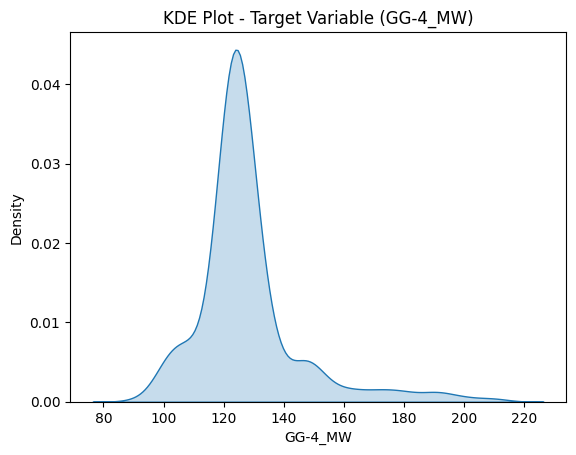

In [39]:
sns.kdeplot(df['  GG-4_MW  '], shade=True)
plt.title("KDE Plot - Target Variable (GG-4_MW)")
plt.xlabel("GG-4_MW")
plt.show()


In [16]:
print(df.shape)

(744, 108)


In [17]:
null_columns = df.columns[df.isnull().any()]
print(df[null_columns].isnull().sum())


GENERATOR MVAR                 22
SH/RH ATTEMP TEMP              22
04-TC107.ACE                   22
43HLD10CT113A_XQ03.VALUE      401
dtype: int64


In [18]:
df.fillna(df.mean(), inplace=True) 


In [19]:
print(df.isnull().sum())


  GG-4_MW                                 0
  GENERATOR MVAR                          0
  SH/RH ATTEMP TEMP                       0
  Mill Outlet Feeder -B coal ON BELT      0
  Gravimetric Feeder A COAL ON BELT       0
                                         ..
  SEC AIR I/L TEMP-A                      0
  43HBK10AA101_XJ50.VALUE                 0
  PA HEADER PRESSURE-1                    0
  PA HEADER PRESSURE-2                    0
heat rate                                 0
Length: 108, dtype: int64


Dataset Spliting

In [20]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['  GG-4_MW  ']) 
y = df['  GG-4_MW  '] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [21]:
df.head()

GG-4_MW      GENERATOR MVAR      SH/RH ATTEMP TEMP    \
0      127.498              26.340                 26.340   
1      127.999              26.281                 26.281   
2      128.031              26.277                 26.277   
3      128.058              26.274                 26.274   
4      127.805              26.270                 26.270   

     Mill Outlet Feeder -B coal ON BELT    \
0                                     0.0   
1                                     0.0   
2                                     0.0   
3                                     0.0   
4                                     0.0   

     Gravimetric Feeder A COAL ON BELT    \
0                                    0.0   
1                                    0.0   
2                                    0.0   
3                                    0.0   
4                                    0.0   

     Gravimetric Feeder D COAL ON BELT    \
0                                 26.819   
1                                 26.487   
2                                 26.154   
3                                 25.822   
4                                 25.489   

     Gravimetric Feeder C COAL ON BELT    \
0                                 25.672   
1                                 24.755   
2                                 23.838   
3                                 23.033   
4                                 22.819   

     Gravimetric Feeder F COAL ON BELT    \
0                                 26.118   
1                                 23.861   
2                                 21.604   
3                                 19.813   
4                                 19.376   

     Gravimetric Feeder E COAL ON BELT      CEP SUCTION  TEMP-A    ...  \
0                                 24.206                   46.913  ...   
1                                 23.857                   46.584  ...   
2                                 23.508                   46.546  ...   
3                                 23.159                   46.387  ...   
4                                 22.810                   46.300  ...   

     43LBA10DT901_XJ04.VALUE      43LBC00CP102_XQ01.VALUE    \
0                      538.540                       21.046   
1                      539.810                       21.230   
2                      541.304                       21.066   
3                      544.979                       20.930   
4                      544.338                       20.899   

     43HLD10CT106A_TA08.VALUE      43HLD20CT101A_TA11.VALUE    \
0                       289.041                        27.125   
1                       291.854                        26.876   
2                       294.275                        26.902   
3                       298.003                        26.938   
4                       295.996                        26.975   

     43HLB01DF902_XT02.VALUE      SEC AIR I/L TEMP-A    \
0                      329.297                  27.502   
1                      351.073                  27.373   
2                      361.672                  27.245   
3                      387.005                  27.116   
4                      353.150                  26.987   

     43HBK10AA101_XJ50.VALUE      PA HEADER PRESSURE-1    \
0                       -0.285                   710.327   
1                       -0.344                   711.050   
2                       -0.366                   711.240   
3                       -0.366                   710.597   
4                       -0.366                   710.701   

     PA HEADER PRESSURE-2    heat rate  
0                   698.316       2446  
1                   699.247       2465  
2                   699.342       2455  
3                   699.258       2444  
4                   699.150       2434  

[5 rows x 108 columns]

Random Forest Regressor Model


In [22]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(X_train, y_train)


RandomForestRegressor()

In [23]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

y_pred = model.predict(X_test)
rf_r2 = r2_score(y_test, y_pred)
rf_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
rf_mae = mean_absolute_error(y_test, y_pred)
print(rf_r2)
print(rf_mae)
print(rf_rmse)



0.9936098369915883
0.835195637583898
1.534655903175823


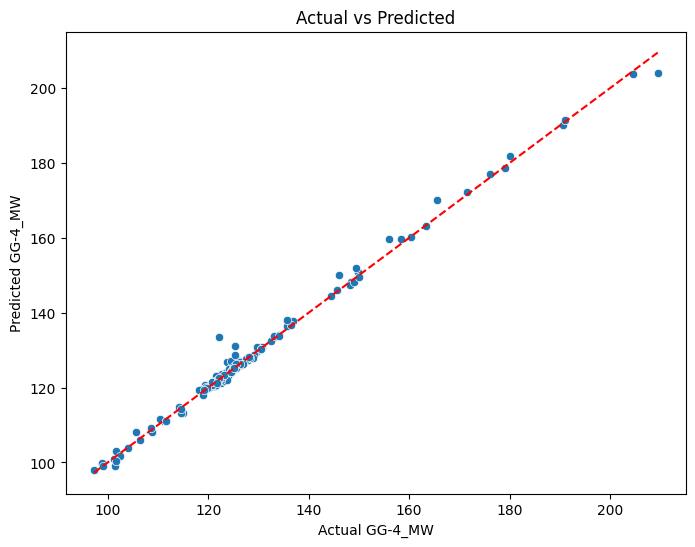

In [24]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual GG-4_MW")
plt.ylabel("Predicted GG-4_MW")
plt.title("Actual vs Predicted")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')
plt.show()


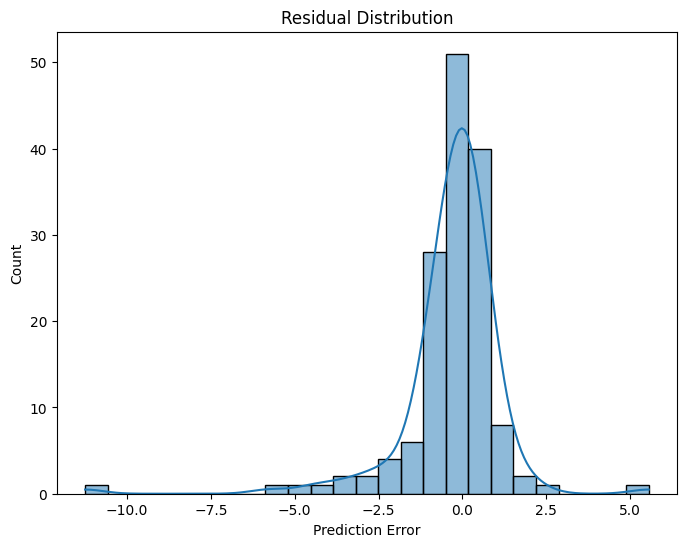

In [25]:
residuals = y_test - y_pred
plt.figure(figsize=(8,6))
sns.histplot(residuals, kde=True)
plt.title("Residual Distribution")
plt.xlabel("Prediction Error")
plt.show()


Feature Engineering

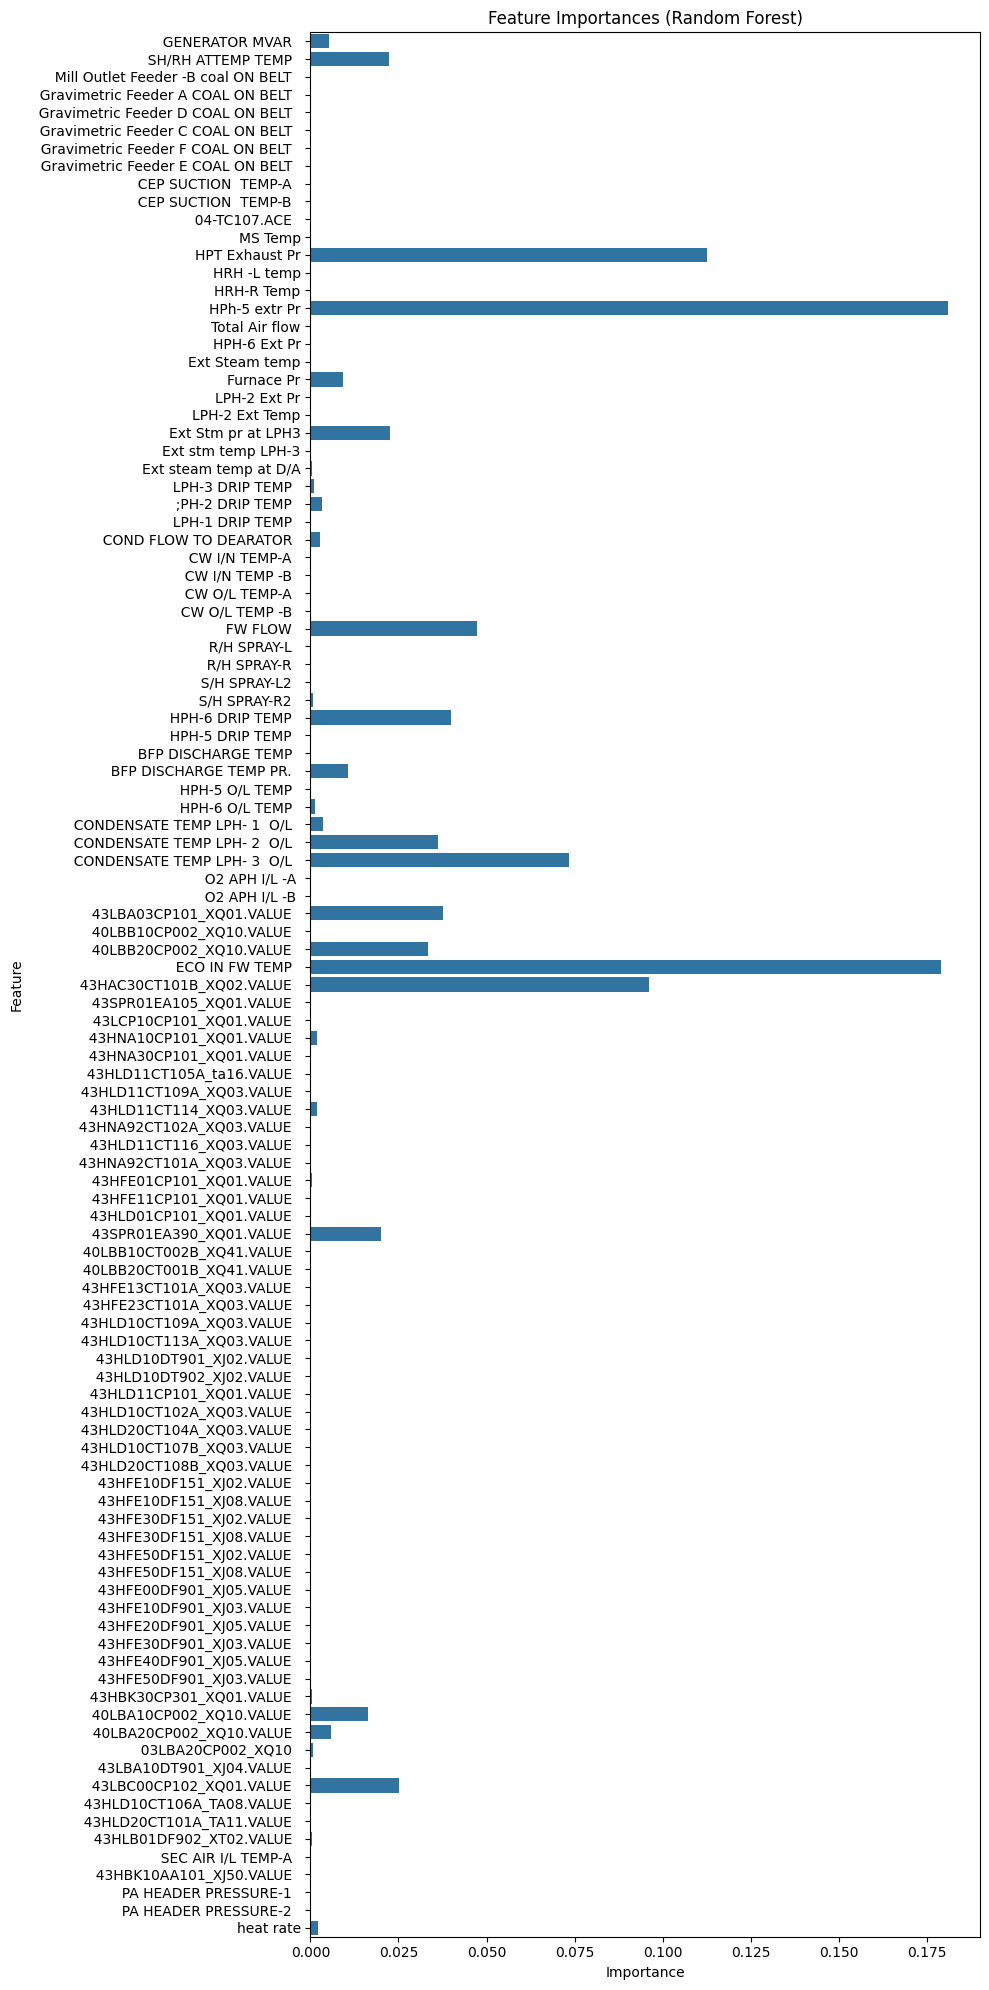

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

importances = model.feature_importances_
features = X.columns

plt.figure(figsize=(10,20))
sns.barplot(x=importances, y=features)
plt.title("Feature Importances (Random Forest)")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


In [27]:
important_features = [
    'HPh-5 extr Pr',
    '  ECO IN FW TEMP  ',
    'HPT Exhaust Pr',
#    '  GENERATOR MVAR  ',
    '  SH/RH ATTEMP TEMP  ',
    'Furnace Pr',
  #  'Ext Stm pr at LPH3',
    '  FW FLOW  ',
    '  CONDENSATE TEMP LPH- 2  O/L  ',
    '  CONDENSATE TEMP LPH- 3  O/L  ',
    '  43LBA03CP101_XQ01.VALUE  ',
    '  43HAC30CT101B_XQ02.VALUE  ',
    '  43SPR01EA390_XQ01.VALUE  '
]

RMSE: 0.9019703024449334
R2 Score: 0.9977926338142944
MAE: 0.6188748857462499


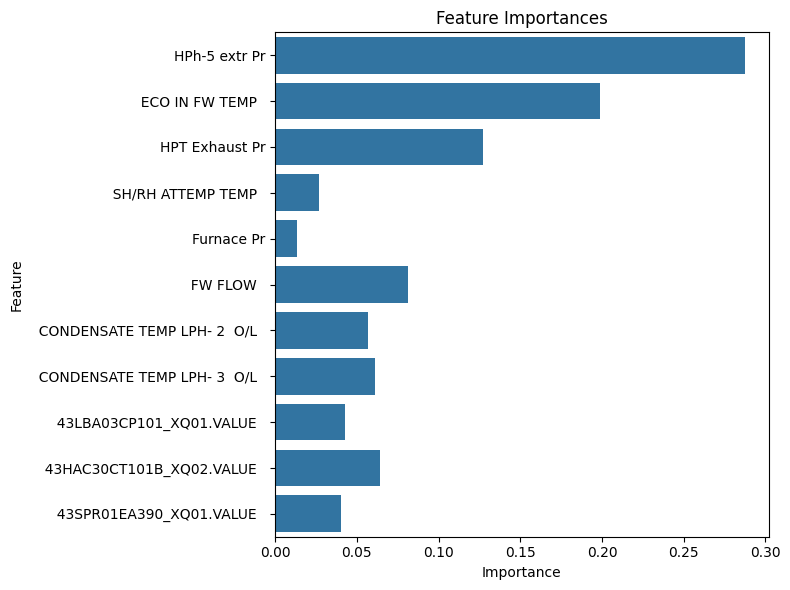

In [28]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

important_features = [
    'HPh-5 extr Pr',
    '  ECO IN FW TEMP  ',
    'HPT Exhaust Pr',
    '  SH/RH ATTEMP TEMP  ',
    'Furnace Pr',
    '  FW FLOW  ',
    '  CONDENSATE TEMP LPH- 2  O/L  ',
    '  CONDENSATE TEMP LPH- 3  O/L  ',
    '  43LBA03CP101_XQ01.VALUE  ',
    '  43HAC30CT101B_XQ02.VALUE  ',
    '  43SPR01EA390_XQ01.VALUE  '
]

X_important = X[important_features]

from sklearn.model_selection import train_test_split
Xf_train, Xf_test, yf_train, yf_test = train_test_split(X_important, y, test_size=0.2, random_state=42)

modelf = RandomForestRegressor(random_state=42)
modelf.fit(Xf_train, yf_train)


yf_pred = modelf.predict(Xf_test)

print("RMSE:", np.sqrt(mean_squared_error(yf_test, yf_pred)))
print("R2 Score:", r2_score(yf_test, yf_pred))
print("MAE:",(mean_absolute_error(yf_test, yf_pred)))

importance = modelf.feature_importances_
features = X_important.columns

plt.figure(figsize=(8,6))
sns.barplot(x=importance, y=features)
plt.title("Feature Importances")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


Predicting Output

In [29]:
def predict_output(input_dict, model, feature_list):
    """
    input_dict: dict of shape {feature_name: value}
    model: trained RandomForestRegressor
    feature_list: list of selected important features
    """
    input_df = pd.DataFrame([input_dict], columns=feature_list)

    # Predict using model
    prediction = modelf.predict(input_df)[0]

    return prediction


In [30]:
example_input = {
    'HPh-5 extr Pr': 8.745,
    '  ECO IN FW TEMP  ': 219.517,
    'HPT Exhaust Pr': 22.396,
    '  SH/RH ATTEMP TEMP  ': 26.34,
    'Furnace Pr': -0.761,
    '  FW FLOW  ': 414.995,
    '  CONDENSATE TEMP LPH- 2  O/L  ': 76.073,
    '  CONDENSATE TEMP LPH- 3  O/L  ': 104.758,
    '  43LBA03CP101_XQ01.VALUE  ': 	86.316,
    '  43HAC30CT101B_XQ02.VALUE  ': 219.395,
    '  43SPR01EA390_XQ01.VALUE  ': 	3.321
}

predicted_value = predict_output(example_input, model, important_features)
print("Predicted Value:", predicted_value)


Predicted Value: 127.68207999999983


XG Boost Model

In [31]:
pip install xgboost


Note: you may need to restart the kernel to use updated packages.


In [32]:
from xgboost import XGBRegressor

xgb_model = XGBRegressor(random_state=42)
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)

print("\nXGBoost Results:")
print("R² Score:", r2_score(y_test, xgb_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, xgb_pred)))
print("MAE:", mean_absolute_error(y_test, xgb_pred))



XGBoost Results:
R² Score: 0.9916704169136672
RMSE: 1.7521314219633668
MAE: 0.9180122496329693


Support Vector Machine Model

In [33]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

svr_model = make_pipeline(StandardScaler(), SVR(kernel='rbf'))
svr_model.fit(X_train, y_train)
svr_pred = svr_model.predict(X_test)

print("\nSVR Results:")
print("R² Score:", r2_score(y_test, svr_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, svr_pred)))
print("MAE:", mean_absolute_error(y_test, svr_pred))



SVR Results:
R² Score: 0.4916371935671564
RMSE: 13.68806094313989
MAE: 5.7464083629926055


Final Accuracy

In [34]:
results = pd.DataFrame({
    "Model": ["Random Forest", "XGBoost", "SVR"],
    "R2 Score": [
        r2_score(y_test, y_pred),
        r2_score(y_test, xgb_pred),
        r2_score(y_test, svr_pred)
    ],
    "RMSE": [
        np.sqrt(mean_squared_error(y_test, y_pred)),
        np.sqrt(mean_squared_error(y_test, xgb_pred)),
        np.sqrt(mean_squared_error(y_test, svr_pred))
    ],
    "MAE": [
        mean_absolute_error(y_test, y_pred),
        mean_absolute_error(y_test, xgb_pred),
        mean_absolute_error(y_test, svr_pred)
    ]
})

print("\nModel Performance Comparison:")
print(results)



Model Performance Comparison:
           Model  R2 Score       RMSE       MAE
0  Random Forest  0.993610   1.534656  0.835196
1        XGBoost  0.991670   1.752131  0.918012
2            SVR  0.491637  13.688061  5.746408


Visualization with plots on important features

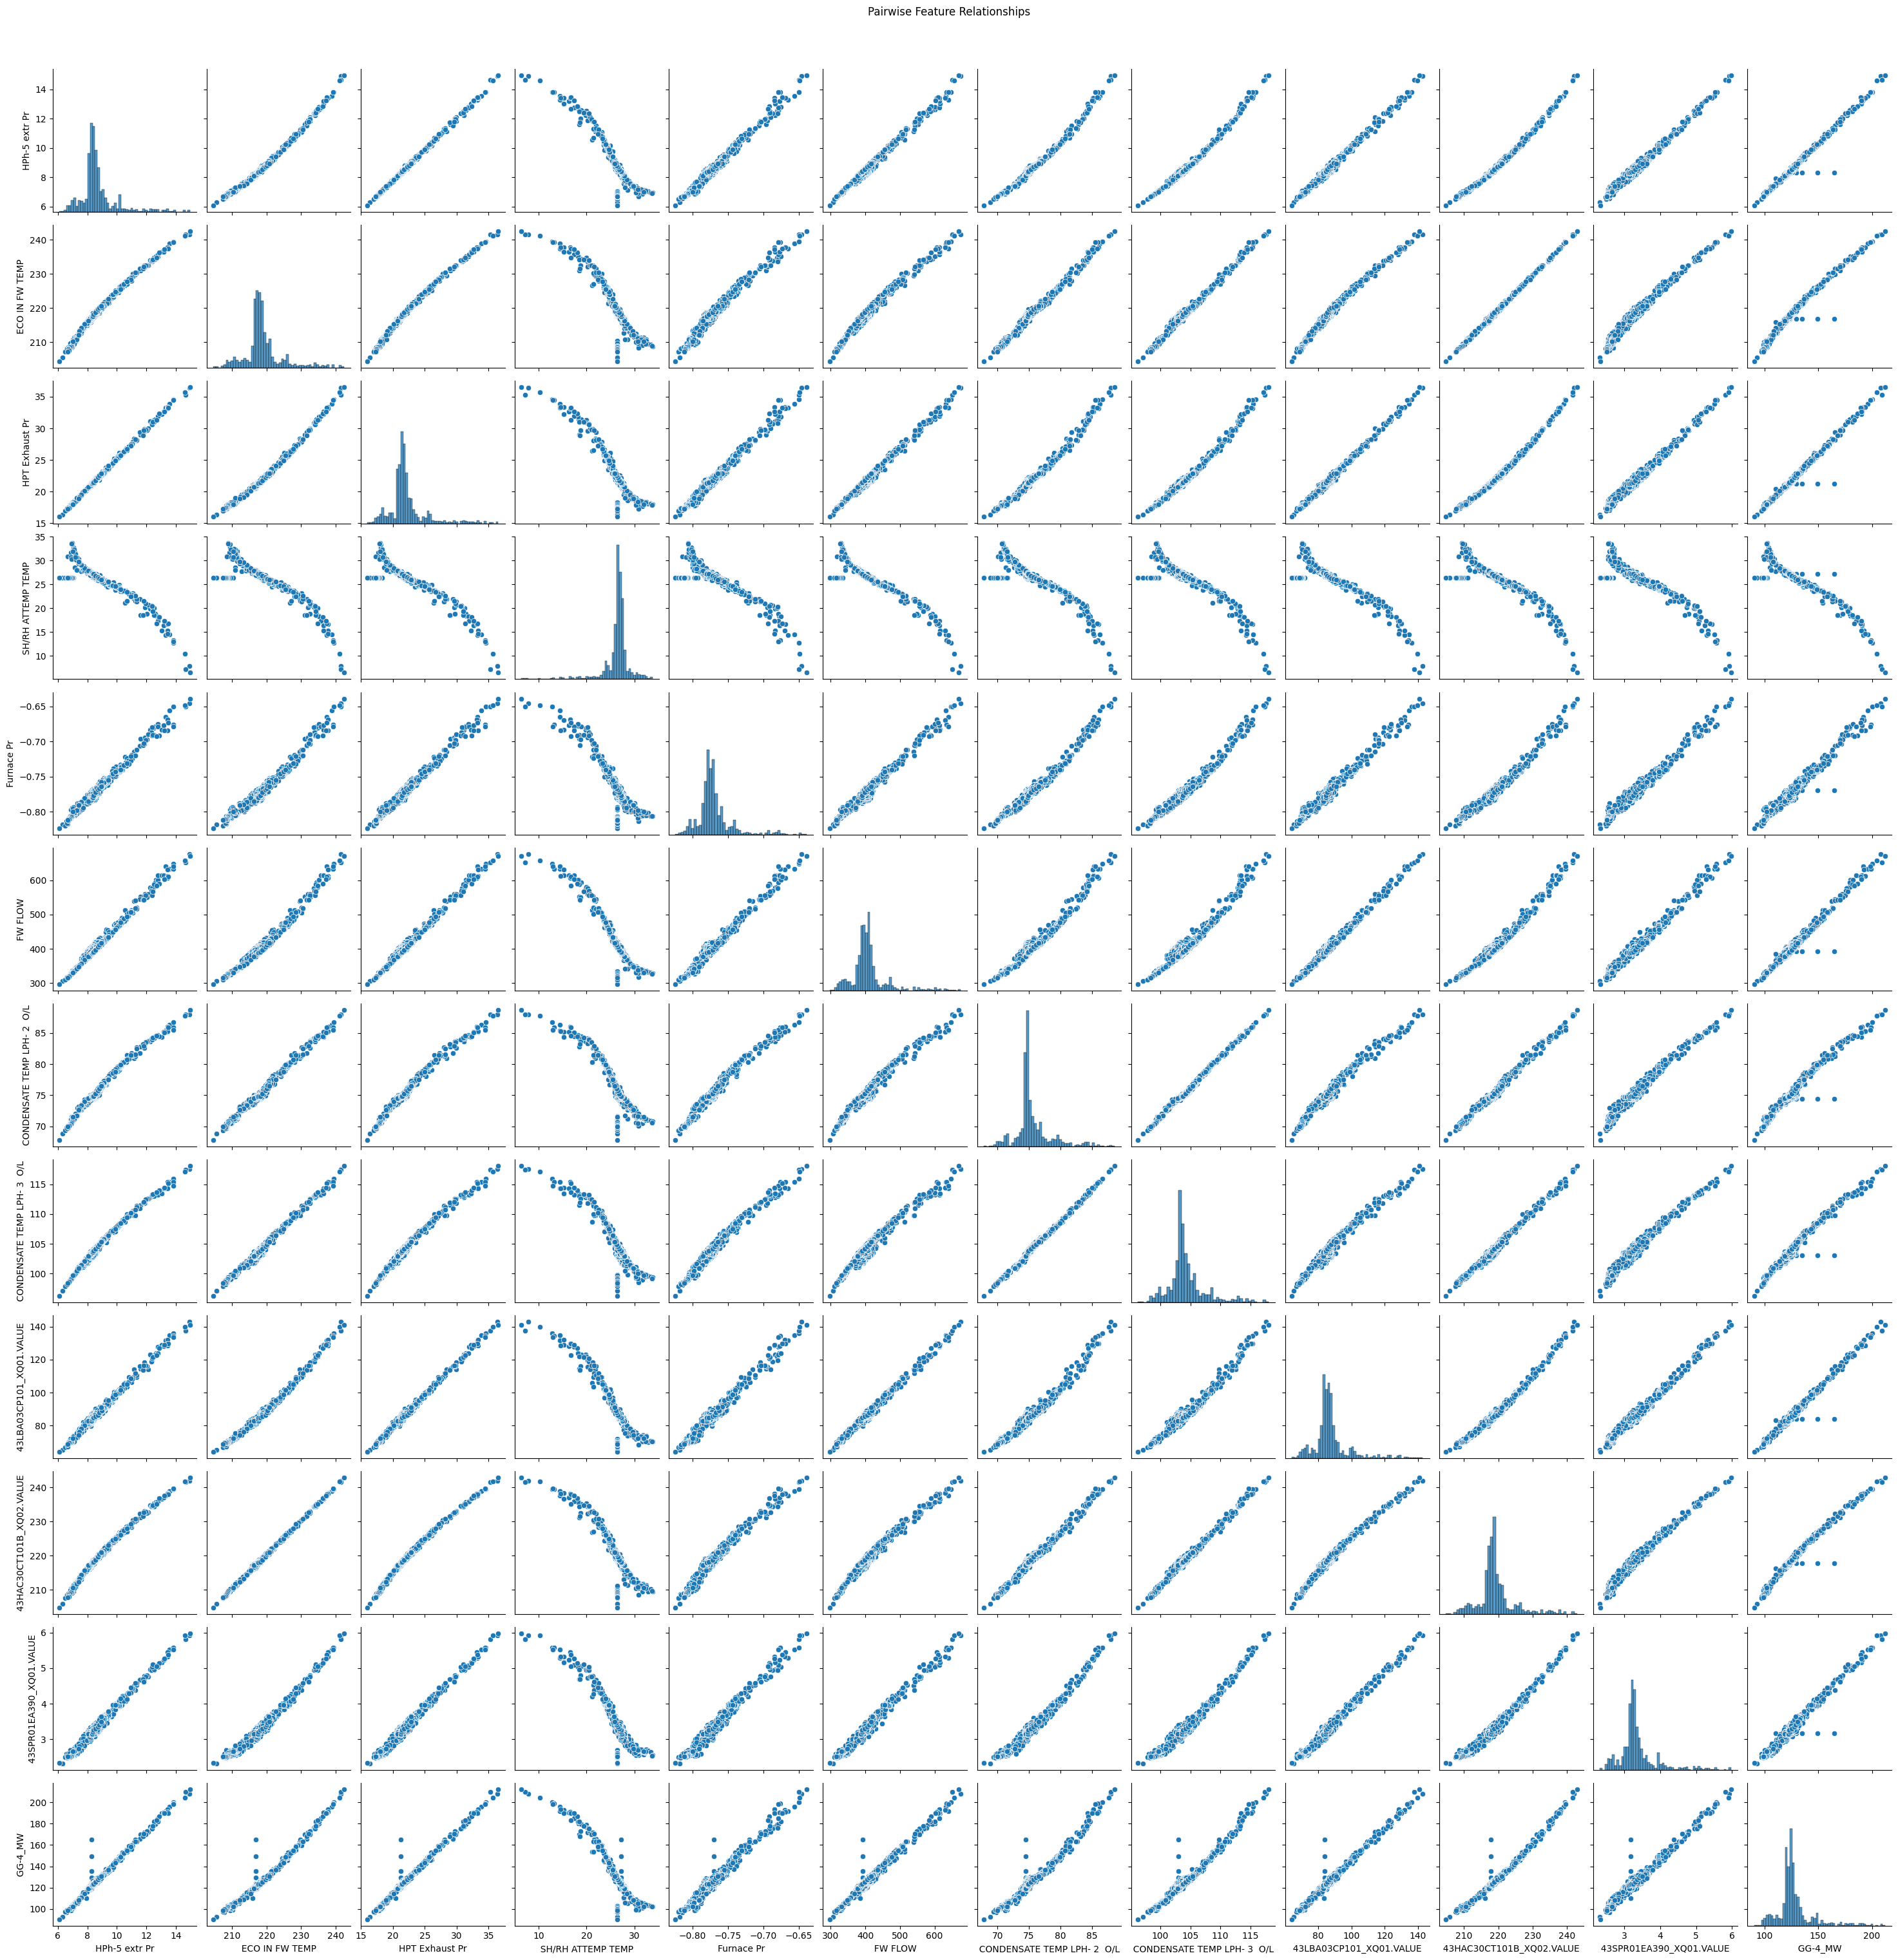

In [35]:
sns.pairplot(df[important_features + ['  GG-4_MW  ']])
plt.suptitle("Pairwise Feature Relationships", y=1.02)
plt.show()


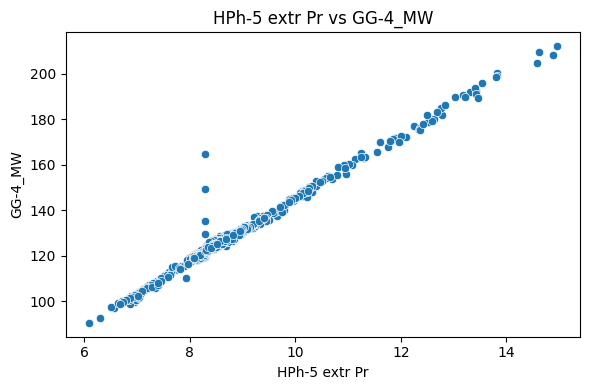

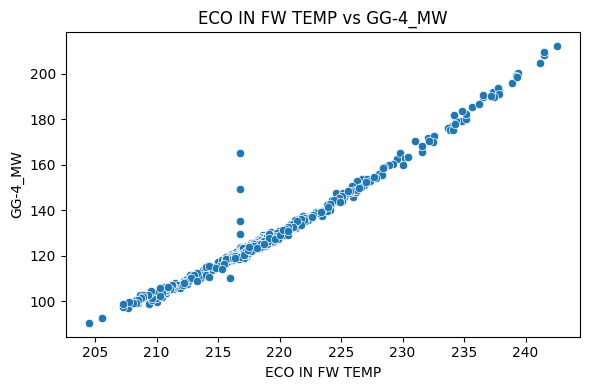

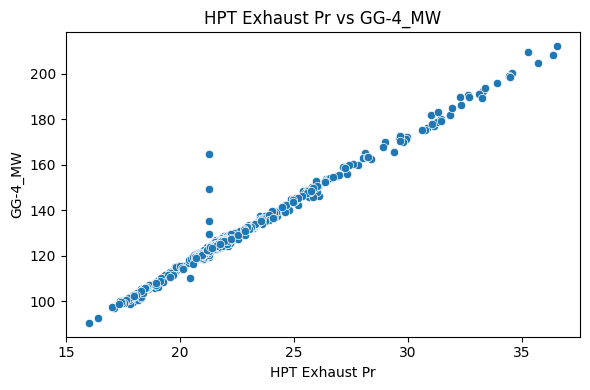

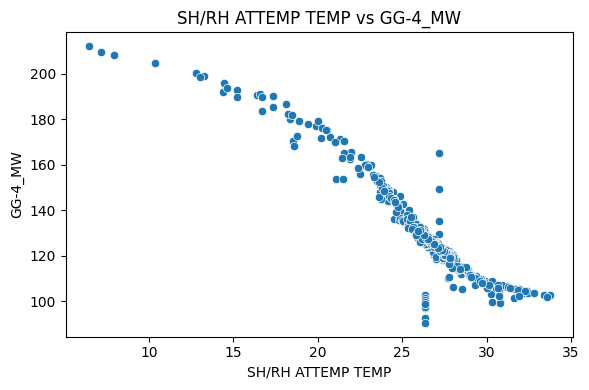

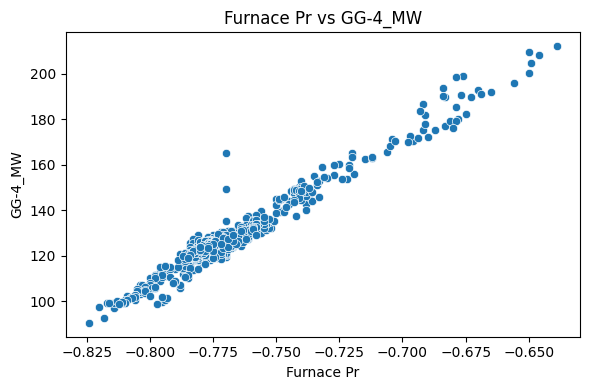

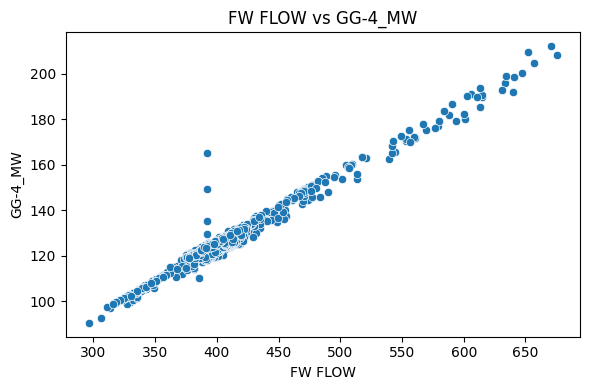

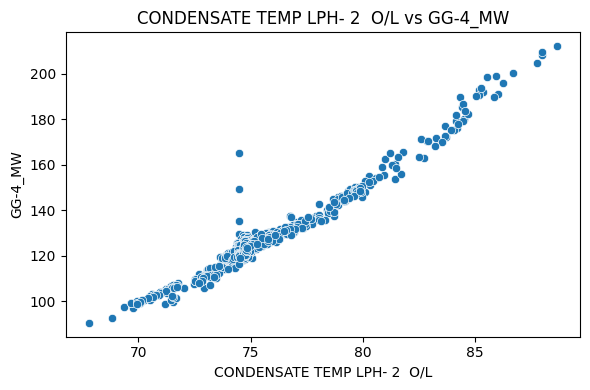

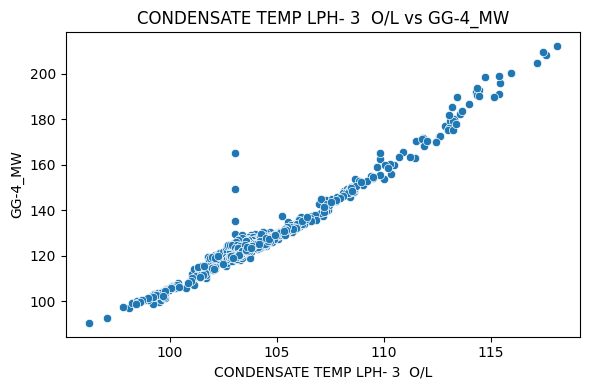

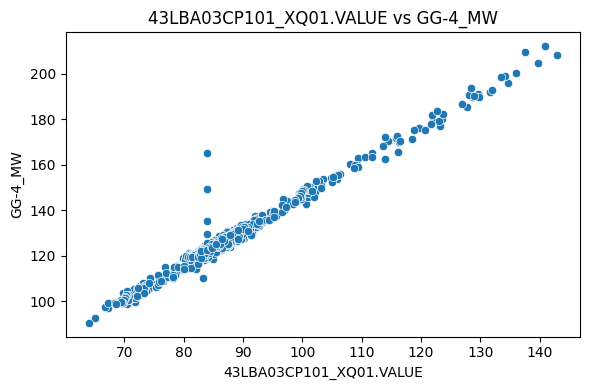

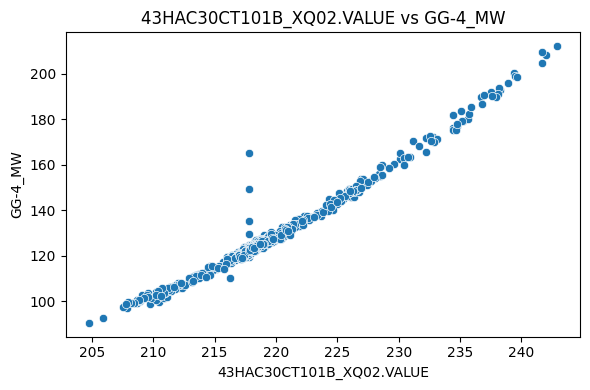

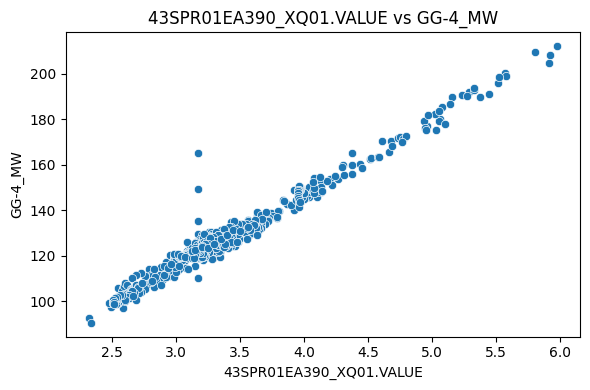

In [36]:
for col in important_features:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(x=df[col], y=df['  GG-4_MW  '])
    plt.title(f"{col.strip()} vs GG-4_MW")
    plt.xlabel(col.strip())
    plt.ylabel("GG-4_MW")
    plt.tight_layout()
    plt.show()
